# Lightcurve inspection for determining X-ray state

This notebook is used to open Swift/BAT or MAXI ligthcurve data to see if the object is in quiescence or outburst during NIR observations, and to pick the Swift/XRT observations that correspond to the same state

Author: Iris Reitsma 


In [1]:
"""
Importing all libraries needed.
"""


from astropy.io import ascii
from astropy.time import Time

import matplotlib.pyplot as plt

In [2]:
""" 
Defining parameters and importing the Swift/BAT and MAXI ligthcurve data.

PARAMETERS to be set by the user:
- source: name of the XRB. Needs to match the correspondng directory name;
- date: date of the NIR observation
- bat_flname: insert filename of the BAT lightcurve data
- maxi_flname: insert filename of the MAXI ligthcurve data
"""

source = "XTE_J1719-291" 
date = '2013-06-18'
filepath = "E:/Scriptie/Spectra/L_x/" + source
lc_flname = filepath + "/" + "XTEJ1719-291.lc.txt"

t = Time(date, scale='utc')
data = ascii.read(lc_flname)  
figname_state = filepath + '/' + source + "_statefig_bat.png"

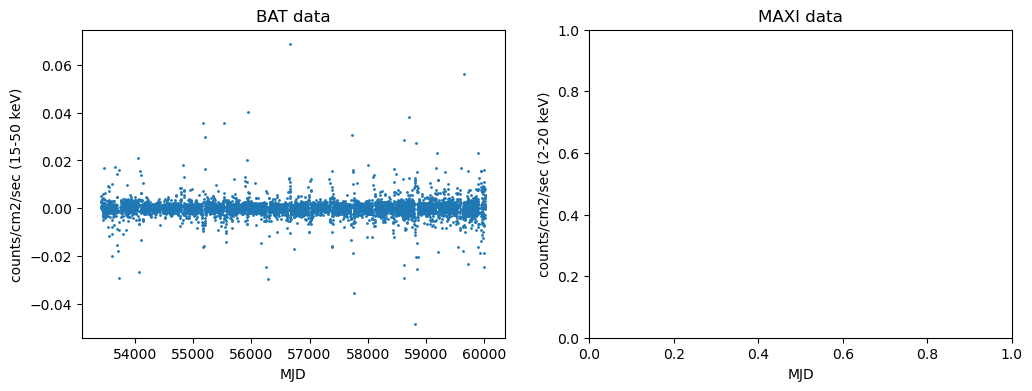

In [3]:
""" 
Plot both lightcurves separately
"""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(data[ 'col1'], data['col2'], 'o', ms=1)
# ax2.plot(data_maxi[ 'col1'], data_maxi['col2'], 'o', ms=1, color='C1', label='MAXI')
ax1.set_title('BAT data')
ax2.set_title('MAXI data')
ax1.set_ylabel('counts/cm2/sec (15-50 keV)')
ax1.set_xlabel('MJD')
ax2.set_ylabel('counts/cm2/sec (2-20 keV)')
ax2.set_xlabel('MJD')
plt.show()

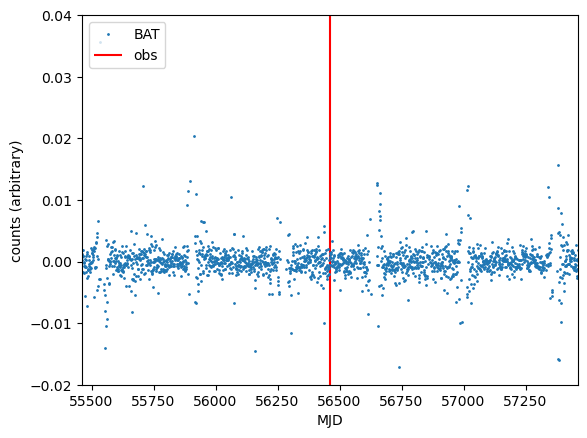

In [4]:
""" 
Check if source is in quiescence or triensient during NIR observation
"""

# Set the parameters for plotting 
x_up = t.mjd + 1000
x_low = t.mjd - 1000
y_up = 0.04
y_low = -0.02

# Plot the lightcurve and observation day
plt.plot(data[ 'col1'], data['col2'], 'o', ms=1, label='BAT')
plt.ylim(y_low, y_up)
plt.xlim(x_low, x_up)
plt.vlines(t.mjd, y_low, y_up, 'Red', label='obs')
plt.legend(loc='upper left')
plt.ylabel('counts (arbitrary)')
plt.xlabel('MJD')
plt.savefig(figname_state)
plt.show()

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


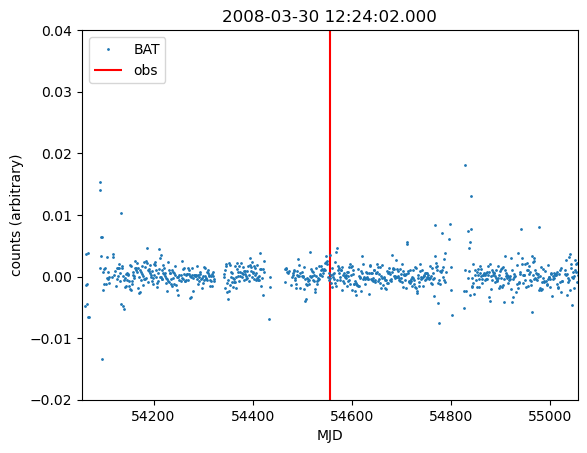

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


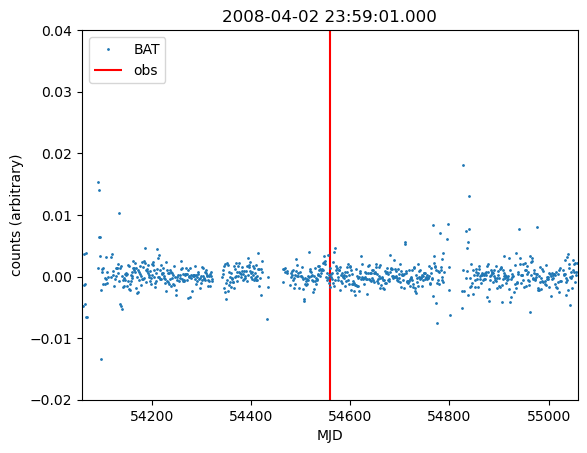

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


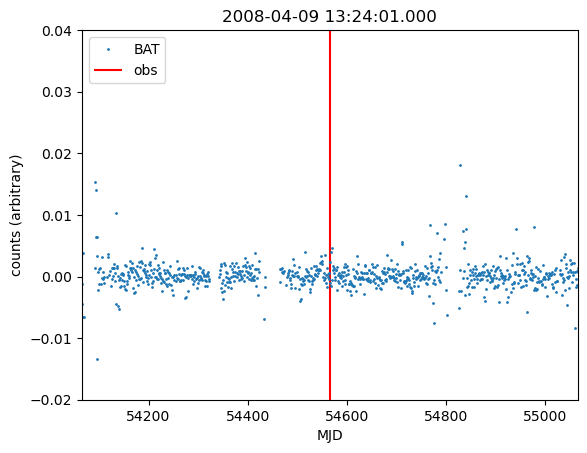

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


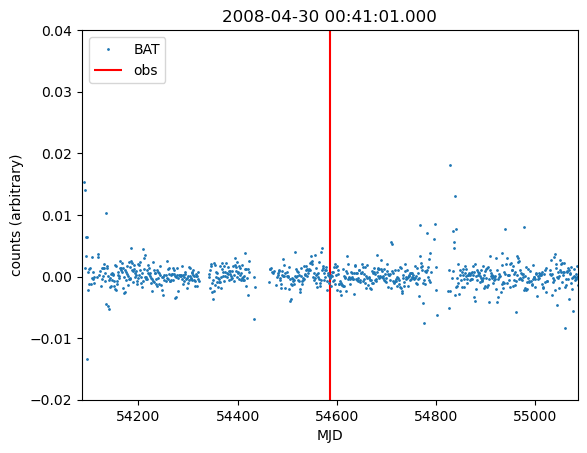

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


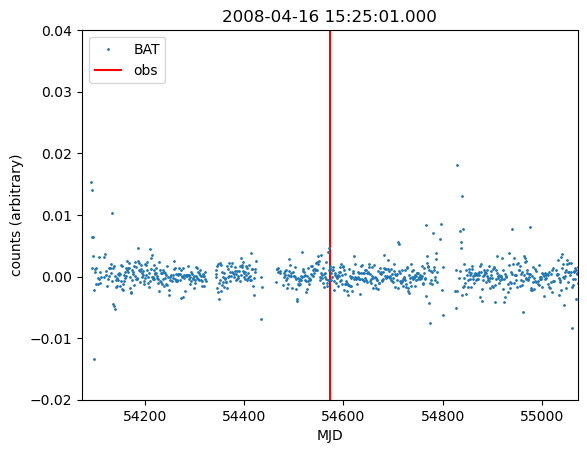

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


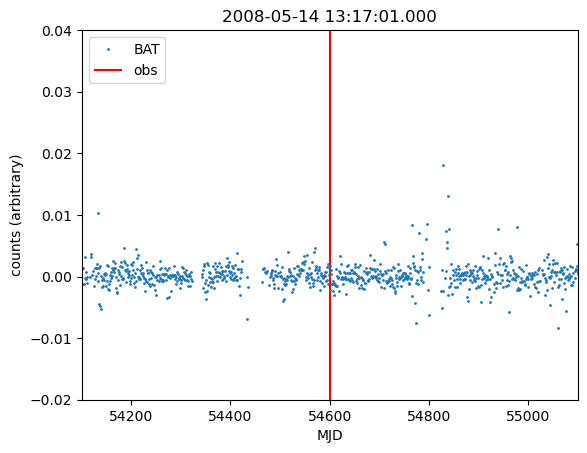

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


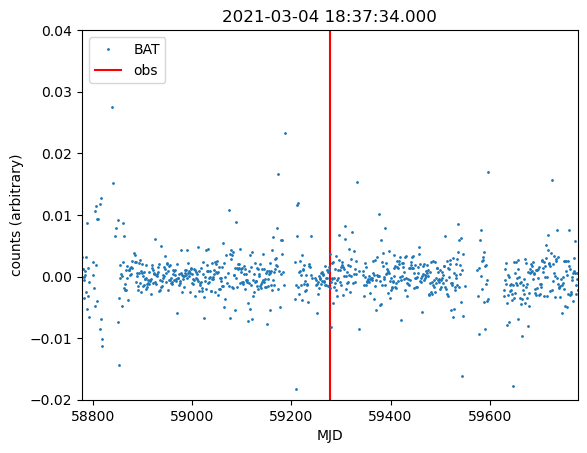

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


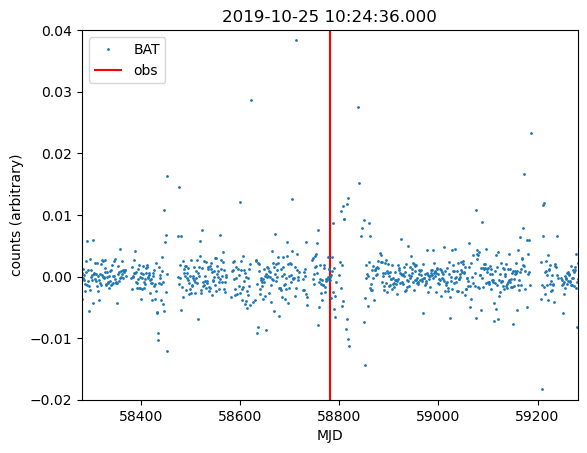

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\astropy\time\formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


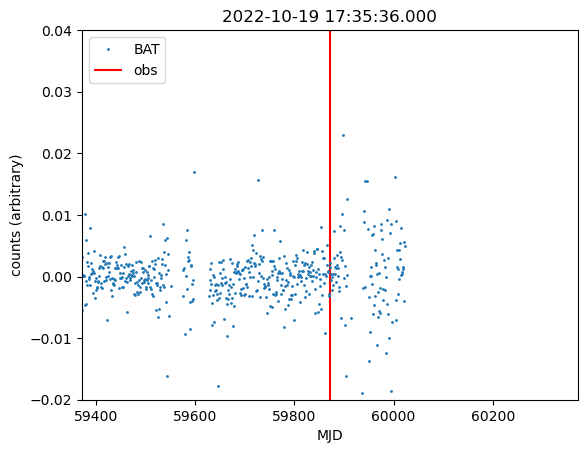

In [5]:
""" 
Check for which observations source is in same state as NIR observation
"""

times = ['2008-03-30 12:24:02', '2008-04-02 23:59:01', '2008-04-09 13:24:01', '2008-04-30 00:41:01', '2008-04-16 15:25:01', '2008-05-14 13:17:01',  '2021-03-04 18:37:34', '2019-10-25 10:24:36', '2022-10-19 17:35:36']
t = Time(times, scale='utc')

for i in t: 
    # Set the parameters for plotting (boundaries, normalization)
    x_up = i.mjd + 500
    x_low = i.mjd - 500
    y_up = 0.04
    y_low = -0.02
    norm = 100

    # Plot the lightcurves and observation day
    plt.plot(data[ 'col1'], data['col2'], 'o', ms=1, label='BAT')
    plt.ylim(y_low, y_up)
    plt.xlim(x_low, x_up)
    plt.vlines(i.mjd, y_low, y_up, 'Red', label='obs')
    plt.legend(loc='upper left')
    plt.ylabel('counts (arbitrary)')
    plt.xlabel('MJD')
    plt.title(i)
    plt.show()